# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

In this project, I will be extracting valuable informations from the [Customer Personality Analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis), which contains a plethora of different features about each customer. These feature are going to be useful as we will use them for a form of unsupervised learning : clustering. Indeed, we're going to create clusters of the different kinds of customers to help the choose the right marketing solutions. The data has the following features:

## People

| Name | Description |
| :-----------: | :-----------: |
|ID| Customer's unique identifier|
|Year_Birth| Customer's birth year|
|Education|Customer's education level|
|Marital_Status| Customer's marital status|
|Income| Customer's yearly household income|
|Kidhome| Number of children in customer's household|
|Teenhome| Number of teenagers in customer's household|
|Dt_Customer| Date of customer's enrollment with the company|
|Recency| Number of days since customer's last purchase|
|Complain| 1 if the customer complained in the last 2 years, 0 otherwise|

## Products

| Name | Description |
| :-----------: | :-----------: |
|MntWines| Amount spent on wine in last 2 years|
|MntFruits| Amount spent on fruits in last 2 years|
|MntMeatProducts| Amount spent on meat in last 2 years|
|MntFishProducts| Amount spent on fish in last 2 years|
|MntSweetProducts| Amount spent on sweets in last 2 years|
|MntGoldProds| Amount spent on gold in last 2 years|

## Promotion

| Name | Description |
| :-----------: | :-----------: |
|NumDealsPurchases| Number of purchases made with a discount
|AcceptedCmp1| 1 if customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2| 1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3| 1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4| 1 if customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5| 1 if customer accepted the offer in the 5th campaign, 0 otherwise|
|Response| 1 if customer accepted the offer in the last campaign, 0 otherwise|

## Place

| Name | Description |
| :-----------: | :-----------: |
|NumWebPurchases| Number of purchases made through the company’s website|
|NumCatalogPurchases| Number of purchases made using a catalogue|
|NumStorePurchases| Number of purchases made directly in stores|
|NumWebVisitsMonth| Number of visits to company’s website in the last month|

# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Table of content</p>

* [1. SETUP](#1)
* [2. DATA CLEANING](#2)
* [3. FEATURE ENGINEERING](#3)
* [4. EDA](#4)
* [5. DATA PREPROCESSING](#5)
* [6. DIMENSIONALITY REDUCTION](#6)
* [7. CLUSTERING](#7)
* [8. PROFILING](#8)
* [9. CONCLUSION](#9)

<a id ="1"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Setup</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

S = "\033[1m" + '\033[96m' # Used for colored strings
E = "\033[0m"

palette = ["#003672", "#943400", "#ED8B75", "#F2DC5D", "#0E9594"]

In [2]:
data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<a id ="1"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data cleaning</p>

**I generally don't start with Data cleaning ( I generally do it after the EDA ), but here the data is almost clean, so it's not very long and it doesn't penalize us. Indeed, we just have a few missing values and an outlier to remove. The work on this dataset will be more important in the Feature engineering**

In [3]:
shape = data.shape
print(S + f"The dataframe has {shape[0]} records and {shape[1]} features" + E)

The dataframe has 2240 records and 29 features


## Missing Data

In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
print(S+"The number of missing values is low, we can consider dropping these records" + E)
data.dropna(inplace=True)
data.isna().sum()

The number of missing values is low, we can consider dropping these records


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Unique values

In [6]:
data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
# Get rid of an extreme outlier
data = data[data["Income"] < 600000]

In [8]:
print(S + "Z_CostContact and Z_Revenue  being useless ( they only have one unique value), it's not going to help us, so we can drop them. Same goes for ID, but because it doesn't bring any value" + E)
data.drop(["Z_CostContact", "Z_Revenue", "ID"], inplace=True, axis=1)

Z_CostContact and Z_Revenue  being useless ( they only have one unique value), it's not going to help us, so we can drop them. Same goes for ID, but because it doesn't bring any value


<a id ="2"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Feature engineering</p>

**Some of the features are not very convenient. That's why we're going to change some of them to have more representative features. Among them, we can find these changes :**

* Year_Birth -> Age
* Kidhome + Teenhome -> Kids
* All purchases -> Spent
* All accept campaign offers -> TotalAccepted
* DtCustomer -> YearsSinceCustm

**Moreover, our categorical columns have redundant data (single and alone for marital status). Hence, we're going to change them and limit the number of options :**

* Education : Post-Graduate or Under-Graduate
* Marital Status : Single or Relationship

**Finally, we're going to drop some of the columns we've created features from to avoir multicolinearity**

## Adding and replacing features for convenience

In [9]:
data["Age"] = 2022-data["Year_Birth"]
data[["Age","Year_Birth"]].head()

,Age,Year_Birth
0,65,1957
1,68,1954
2,57,1965
3,38,1984
4,41,1981


In [10]:
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data["Kids"].head()

0    0
1    2
2    0
3    1
4    1
Name: Kids, dtype: int64

In [11]:
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Spent"].head()

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

In [12]:
data["TotalAccepted"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]
data["TotalAccepted"].head()

0    0
1    0
2    0
3    0
4    0
Name: TotalAccepted, dtype: int64

In [13]:
data["YearsSinceCustm"] = 2022 - data["Dt_Customer"].str.slice(6,10,1).astype("int16")
data["YearsSinceCustm"].head()

0    10
1     8
2     9
3     8
4     8
Name: YearsSinceCustm, dtype: int16

In [14]:
data["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

## Change values of categorical data

In [15]:
data["Education"].replace(['Graduation', 'PhD', 'Master','2n Cycle'],"Post Graduate", inplace=True)
data["Education"].replace("Basic","Under Graduate", inplace=True)
data["Education"].unique()

array(['Post Graduate', 'Under Graduate'], dtype=object)

In [16]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
data["Marital_Status"].replace(["Together","Married"], "Relationship", inplace=True)
data["Marital_Status"].replace(["Divorced","Widow","Alone","Absurd","YOLO"], "Single", inplace=True)
data["Marital_Status"].unique()

array(['Single', 'Relationship'], dtype=object)

## Remove unused columns

In [18]:
# remove tabs
data = data.drop(["Year_Birth","Kidhome","Teenhome","Dt_Customer",
                "AcceptedCmp3","AcceptedCmp2","AcceptedCmp1","AcceptedCmp4","AcceptedCmp5","Complain","Response"], axis=1)
df = data.copy()
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Kids,Spent,TotalAccepted,YearsSinceCustm
0,Post Graduate,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,65,0,1617,0,10
1,Post Graduate,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,68,2,27,0,8
2,Post Graduate,Relationship,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,57,0,776,0,9
3,Post Graduate,Relationship,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,38,1,53,0,8
4,Post Graduate,Relationship,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,41,1,422,0,8


<a id ="4"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EDA</p>

16% of the customer of this company earn less than 30,000. The median salary is 51,373. Let's see how much do they spend depending on their salary


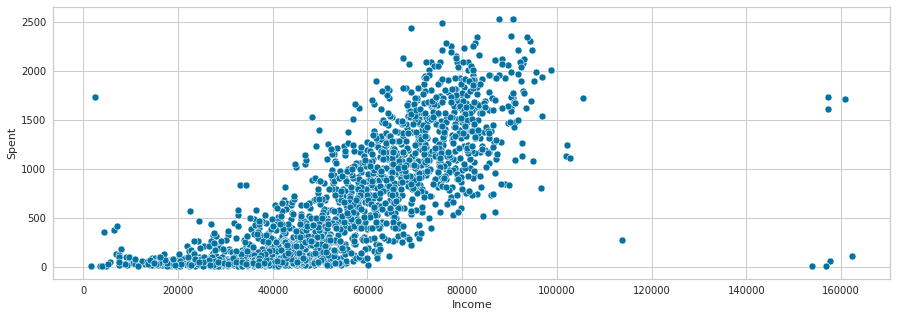

In [19]:
# data["Income"].quantile(0.16)
print(S+f"16% of the customer of this company earn less than 30,000. The median salary is {data['Income'].median():,.0f}. Let's see how much do they spend depending on their salary"+E)

plt.figure(figsize=(15,5))
sns.scatterplot(x="Income",y="Spent",data=data);

As expected, the more the person earns, the more they spend. How about the case where you have children ?





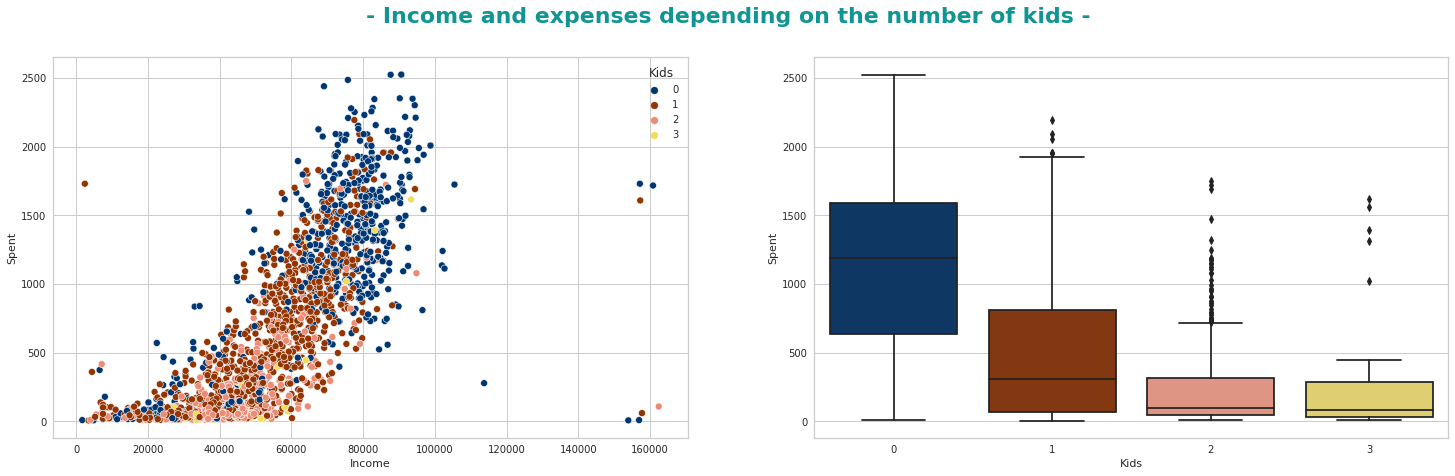

In [20]:
print(S+"As expected, the more the person earns, the more they spend. How about the case where you have children ?\n\n\n")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("- Income and expenses depending on the number of kids -",size=22,weight="bold", color=palette[4])


sns.scatterplot(x="Income",y="Spent",data=data, hue="Kids", palette=palette[:4], ax=ax1)

sns.boxplot(x="Kids",y="Spent",data=data, palette=palette[:4], ax=ax2);

From these plots, we learn 2 things:

* The more children a person has, the less likely they are to spend money
* Income and kids have a negative correlation : a person with fewer kids generally earn more money and the opposite is true as well

We're going to do the same thing depending on the marital status





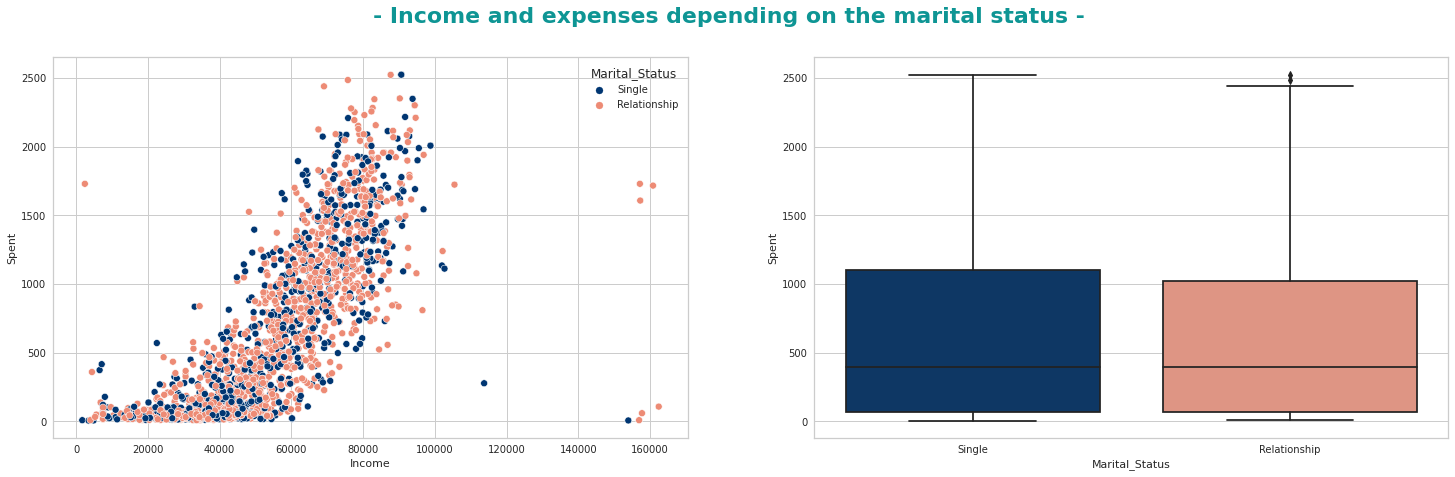

In [21]:
print(S+"We're going to do the same thing depending on the marital status\n\n\n")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("- Income and expenses depending on the marital status -",size=22,weight="bold", color=palette[4])


sns.scatterplot(x="Income",y="Spent",data=data, hue="Marital_Status", palette=[palette[0],palette[2]], ax=ax1)

sns.boxplot(x="Marital_Status",y="Spent",data=data, palette=[palette[0],palette[2]], ax=ax2);

Finally, we're going to check other factors such as loyalty (those who are clients for longer) and Education : 


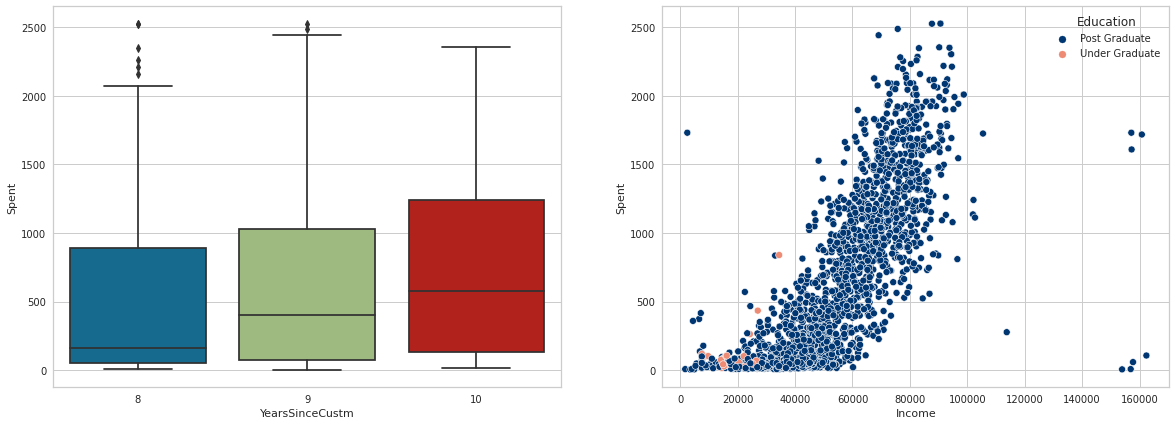

In [22]:
print(S+"Finally, we're going to check other factors such as loyalty (those who are clients for longer) and Education : " +E)

plt.figure(figsize=(20,7))

plt.subplot(121)
sns.boxplot(data=data, y="Spent", x="YearsSinceCustm")

plt.subplot(122)
sns.scatterplot(x="Income",y="Spent",data=data, hue="Education", palette=[palette[0],palette[2]]);

* In addition of being a minority, Under Graduates represent a minority which doesn't spend a lot because they don't earn a lot
* More loyal clients are more likely to spend more money

<a id ="5"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data preprocessing</p>

**Once again, we don't have much work to do to get the data ready to be used with an AI :**

* Make everything numerical with a LabelEncoder from sklearn
* Scale the data so features are on the same scale
* Reduce memory usage ( not very useful here as the dataset is small, but it's always a good practice

## Making everything numerical

In [23]:
data.dtypes

Education               object
Marital_Status          object
Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Age                      int64
Kids                     int64
Spent                    int64
TotalAccepted            int64
YearsSinceCustm          int16
dtype: object

In [24]:
object_cols = (data.dtypes == 'object')
objects = list(object_cols[object_cols].index)
objects

['Education', 'Marital_Status']

In [25]:
le = LabelEncoder()
for obj in objects:
    data[obj] = data[[obj]].apply(le.fit_transform)

In [26]:
data.dtypes
# all values should be numerical

Education                int64
Marital_Status           int64
Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Age                      int64
Kids                     int64
Spent                    int64
TotalAccepted            int64
YearsSinceCustm          int16
dtype: object

## Scaling

In [27]:
ss = StandardScaler()
ss.fit(data)
scaled = pd.DataFrame(ss.transform(data),columns= data.columns )
scaled.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Kids,Spent,TotalAccepted,YearsSinceCustm
0,-0.158077,1.348357,0.286604,0.310113,0.977779,1.548973,1.689714,2.453932,1.484340,0.849633,0.352088,1.428103,2.504074,-0.554500,0.693215,0.986016,-1.264487,1.675011,-0.439383,1.500024
1,-0.158077,1.348357,-0.261407,-0.380899,-0.872375,-0.637338,-0.718196,-0.651178,-0.634081,-0.733043,-0.167829,-1.125846,-0.571253,-1.169839,-0.131420,1.236344,1.405522,-0.962727,-0.439383,-1.417055
2,-0.158077,-0.741643,0.912723,-0.795506,0.358096,0.568903,-0.178646,1.339745,-0.147087,-0.038210,-0.687745,1.428103,-0.229550,1.291518,-0.543738,0.318476,-1.264487,0.279830,-0.439383,0.041484
3,-0.158077,-0.741643,-1.176680,-0.795506,-0.872375,-0.561948,-0.655768,-0.505056,-0.585381,-0.752344,-0.167829,-0.760996,-0.912956,-0.554500,0.280897,-1.266933,0.070517,-0.919594,-0.439383,-1.417055
4,-0.158077,-0.741643,0.293806,1.553934,-0.392047,0.418123,-0.218777,0.152497,-0.000989,-0.559335,1.391921,0.333553,0.112153,0.060839,-0.131420,-1.016605,0.070517,-0.307440,-0.439383,-1.417055


## Reduce memory usage

In [28]:
def reduce_memory_usage(data, verbose=True):
    # from https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering#DATA-PREPROCESSING
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = data.memory_usage().sum() / 1024 ** 2
    for col in data.columns:
        col_type = data[col].dtypes
        if col_type in numerics:
            c_min = data[col].min()
            c_max = data[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    data[col] = data[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    data[col] = data[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)
    end_mem = data.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            f"Mem. usage decreased from {start_mem:.2f} Mb to {end_mem:.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)"
        )
    return data

scaled_and_reduced_data = reduce_memory_usage(scaled, verbose=True)

Mem. usage decreased from 0.34 Mb to 0.08 Mb (75.0% reduction)


<a id ="6"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Dimensionality Reduction</p>

**We're trying to make clusters. However, clustering algorithms struggle when data have a lot of features or when features have multicolinearity. Fortunately, Principal Component Analysis ( PCA ) allows us to to fix both of these problems very simply. We're going to create one dimension ( called Principal Component, PC's ) for each feature, and then check which ones explain the covariance up to 90% ( we can choose another threshold, I chose this one after numerous experiments because the results in the clustering steps were satisfying. We don't try to get 100% explained covariance because our PC's would catch noise**

## Find what are the best dimensions

In [29]:
pca = PCA(n_components=len(scaled_and_reduced_data.columns))
pca.fit(scaled_and_reduced_data);

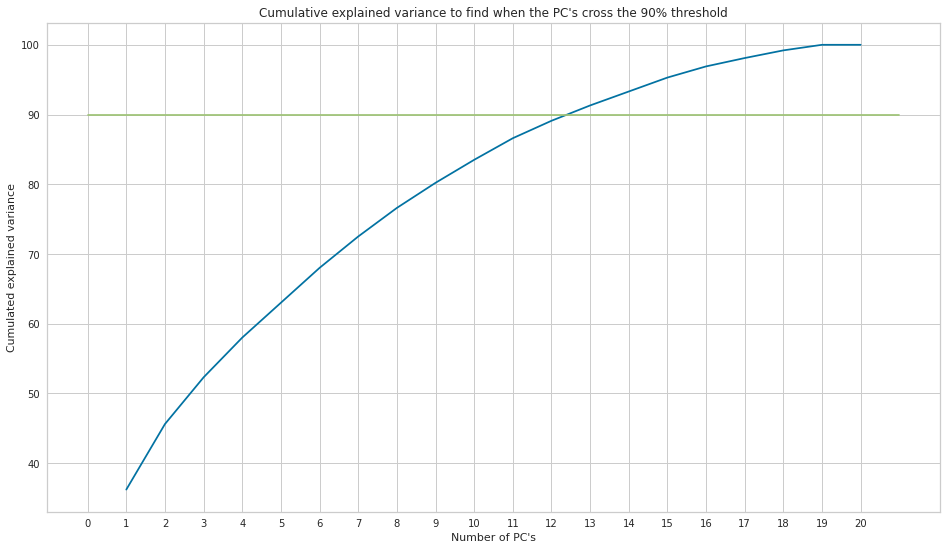

In [30]:
# Eplained variance and Scree plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
cumu_var = np.cumsum(per_var)

plt.figure(figsize=(16,9))
sns.lineplot(x=range(1,21), y=cumu_var)
sns.lineplot(x=[0,21],y=[90,90])
plt.xticks(range(0,21))
plt.xlabel("Number of PC's")
plt.ylabel("Cumulated explained variance")
plt.title("Cumulative explained variance to find when the PC's cross the 90% threshold");

**Based on this, we'll then use 13 Principal Components for clustering, and 3 to visualize the results. We then managed to get rid of 7 dimensions.**

In [31]:
pca_data = pd.DataFrame(pca.transform(scaled_and_reduced_data), columns=["PC"+str(i+1) for i in range(len(scaled_and_reduced_data.columns))]).iloc[:, :13]
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,4.153752,0.988888,1.806138,-1.165783,0.838833,1.151661,0.348525,-1.173495,0.162600,1.177080,-0.487191,2.191703,0.023004
1,-2.578687,-0.752018,-1.852939,-0.512348,0.294830,1.507821,0.579700,0.372401,0.189037,0.831787,-0.242696,-0.095576,0.003208
2,1.842248,-0.188573,-0.103544,-0.496129,-1.211876,-0.238788,0.438730,-0.547337,-0.707681,-1.690523,-0.088198,0.117368,-0.398350
3,-2.586428,-1.201413,-0.173890,0.160926,-1.227816,-0.430787,-0.886290,0.730247,-0.149161,-0.360461,0.104352,0.367782,-0.100707
4,-0.260048,0.113205,-0.416280,-0.868658,0.652997,-1.375168,-1.033978,1.796776,0.330424,-0.379857,-0.182958,0.755410,-0.257814


In [32]:
vis_data = pd.DataFrame(pca.transform(scaled_and_reduced_data), columns=["PC"+str(i+1) for i in range(len(scaled_and_reduced_data.columns))]).iloc[:, :3]
vis_data.head()

,PC1,PC2,PC3
0,4.153752,0.988888,1.806138
1,-2.578687,-0.752018,-1.852939
2,1.842248,-0.188573,-0.103544
3,-2.586428,-1.201413,-0.173890
4,-0.260048,0.113205,-0.416280


In [33]:
fig= px.scatter_3d(vis_data, x="PC1",y="PC2",z="PC3", opacity=0.5)
fig.update_layout(margin=dict(l=0,b=0,r=0,t=0))

## Checking loading scores

In [34]:
loadings = pca.components_[:13]
df_loadings = pd.DataFrame(loadings.T, columns=["PC"+str(i+1) for i in range(13)], index=data.columns)

fig = px.scatter_3d(df_loadings,
                x="PC1",y="PC2",z="PC3",
             text=df_loadings.index)

fig.update_layout(margin=dict(l=0,b=0,r=0,t=0))
fig.show()

In [35]:
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Education,-0.060939,-0.118389,0.458438,0.129710,0.026224,-0.074531,0.718976,0.430490,0.157849,-0.044004,0.000769,-0.073000,-0.003859
Marital_Status,0.007995,-0.033183,0.086236,-0.028230,0.381535,0.907076,-0.059263,0.112439,0.062915,-0.018635,-0.019724,-0.029037,0.011664
Income,0.316387,0.005031,-0.241931,0.010353,0.001710,-0.000456,-0.006457,0.039003,0.155340,-0.045087,0.023071,-0.201279,0.080448
Recency,0.005630,0.016789,-0.000669,-0.122675,0.894043,-0.392558,-0.087638,0.095683,-0.075977,-0.061350,-0.031250,0.027018,-0.038524
MntWines,0.293950,0.204449,-0.077522,0.335345,0.052993,0.003073,0.042357,-0.019367,0.047998,-0.167253,-0.019120,-0.056538,-0.154141
MntFruits,0.257343,-0.098148,0.167764,-0.291714,-0.082453,0.008043,-0.046979,0.045854,-0.094022,0.109367,-0.319529,-0.035130,-0.667623
MntMeatProducts,0.306801,-0.088758,0.038365,0.013138,0.032963,-0.025360,-0.064238,-0.045419,0.351394,0.166030,0.107308,0.284700,-0.033352
MntFishProducts,0.267084,-0.105635,0.164717,-0.272604,-0.062861,-0.007436,-0.007669,-0.001548,-0.093374,0.202931,-0.180064,0.083155,-0.083527
MntSweetProducts,0.257899,-0.081288,0.157220,-0.244584,-0.035900,-0.031396,-0.045587,0.052141,-0.049177,0.076051,-0.503290,-0.060021,0.643057
MntGoldProds,0.212367,0.152238,0.165925,-0.127087,-0.012318,0.035066,0.022586,0.110612,-0.610034,0.319150,0.551444,-0.196508,0.068359


**From this it's hard to tell which feature gives the most explanation. It's not a big deal as we're mostly interested in the characteristics for each cluster, which is the next step**

<a id ="7"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Clustering</p>

## Find the best number of clusters

**The  [elbow method](https://www.youtube.com/watch?v=FqIGui0rwh4) is a way for us to know when it's not necessary to get a bigger number of cluster, hence giving us the optimal number of cluster.**

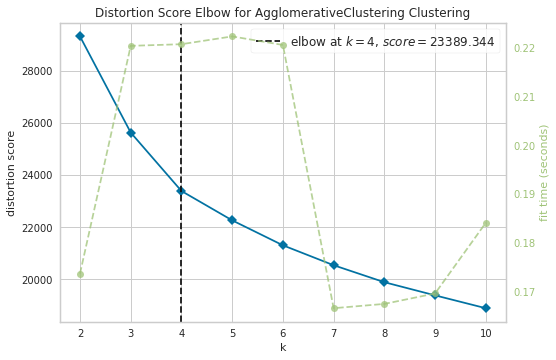

In [36]:
elbow = KElbowVisualizer(AgglomerativeClustering(), k=10)
elbow.fit(pca_data)
elbow.show();

**Indeed, we can clearly see an elbow for k=4, as the rest of the curve is slowly becoming horizontal**

## Create the clusters

In [37]:
ac = AgglomerativeClustering(n_clusters=4)
ac_results = ac.fit_predict(pca_data)
ac_results

array([0, 1, 2, ..., 0, 2, 1])

In [38]:
# Assign the cluster results to our different dataset, because we can use each of them for a different purpose

vis_data["Cluster"] = ac_results
data["Cluster"] = ac_results
df["Cluster"] = ac_results

In [39]:
fig= px.scatter_3d(vis_data, x="PC1",y="PC2",z="PC3", opacity=0.5, color="Cluster",symbol="Cluster")
fig.update_layout(margin=dict(l=0,b=0,r=0,t=0))

**It seems pretty good, some clusters seem to be overlapping but as a reminder, we're not looking at all of the 13 Principal Components, we only look at the 3 first ones which explain ~53% of the variance**

<a id ="8"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Profiling</p>

Seem like cluster 1 is the main type of customer, while cluster 3 is a very rare customer. Indeed, they both represent 48% and 3% of the customers.


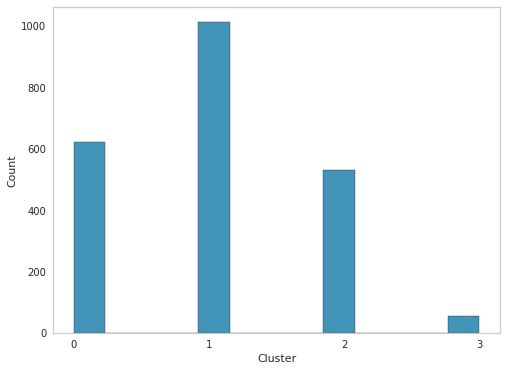

In [40]:
plt.figure(figsize=(8,6))
plt.xticks(range(4))
plt.grid(False)
sns.histplot(data["Cluster"])
print(S + f"Seem like cluster 1 is the main type of customer, while cluster 3 is a very rare customer. \
Indeed, they both represent {data['Cluster'].value_counts()[1] / data.shape[1]:.0f}% and {data['Cluster'].value_counts()[3] / data.shape[1]:.0f}% of the customers.");

## Find the average of each group

In [41]:
clusters_details = {}

for cluster in range(4):
    clusters_details[str(cluster)] = {}
    for column in data.columns[2:-1]:
        clusters_details[str(cluster)][column] = round(data[data["Cluster"]==cluster][column].mean(),2)

In [42]:
dict(
    round(
        df[df["Cluster"]==0]["Marital_Status"].value_counts() /
        df[df["Cluster"]==0]["Marital_Status"].shape[0]
        ,2)
)

{'Relationship': 0.61, 'Single': 0.39}

In [43]:
for cluster in range(4):
    for column in data.columns[:2]: 
        column_results = dict(
    round(
        df[df["Cluster"]==cluster][column].value_counts() /
        df[df["Cluster"]==cluster][column].shape[0]
        ,2)
)
        for result in column_results:
            clusters_details[str(cluster)][result] = column_results[result]

In [44]:
pd.DataFrame(clusters_details)

,0,1,2,3
Income,74598.19,35803.80,59607.53,20306.26
Recency,49.81,48.79,48.61,48.44
MntWines,618.30,53.72,449.85,7.24
MntFruits,67.50,5.24,20.10,11.11
MntMeatProducts,436.42,27.27,134.69,11.44
MntFishProducts,95.65,7.88,28.74,17.06
MntSweetProducts,68.55,5.30,21.50,12.11
MntGoldProds,78.44,17.52,56.37,22.83
NumDealsPurchases,1.53,2.14,3.65,1.80
NumWebPurchases,5.48,2.35,6.00,1.89


**We now have a general idea of the median client for each cluster, let's plot the details to have a better understanding**

## Visually represent each cluster for each feature

In [45]:
object_cols = ["Education", "Marital_Status"]
num_cols = list(data.columns[2:-1])

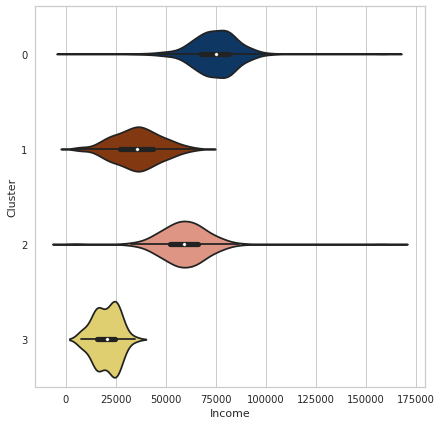

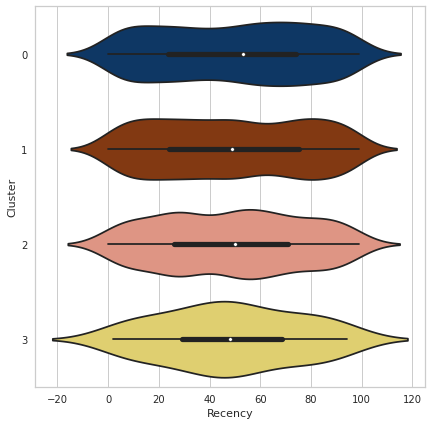

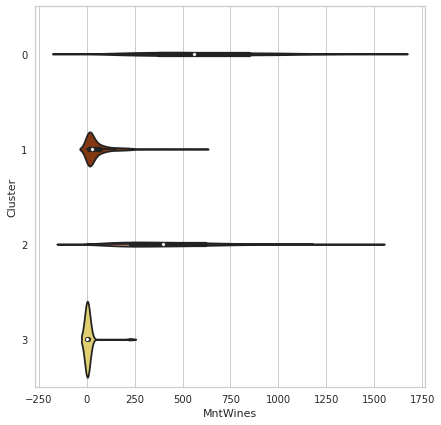

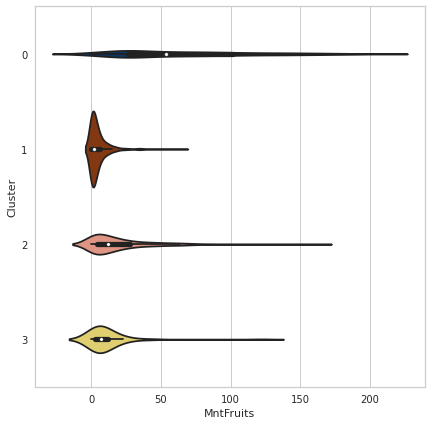

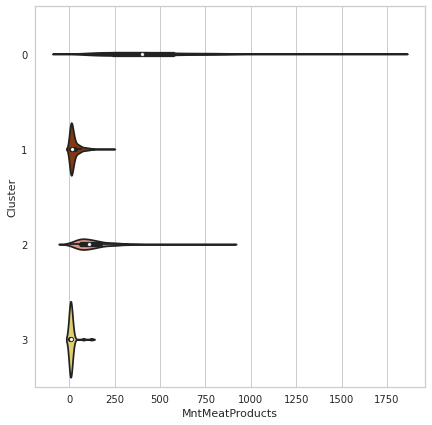

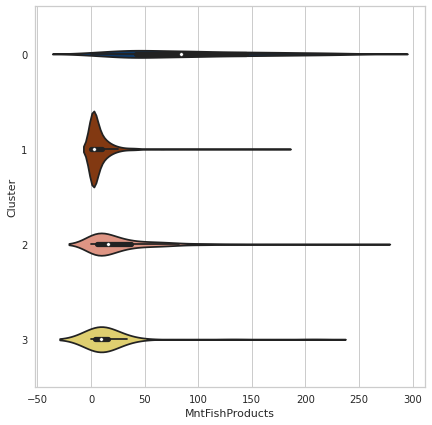

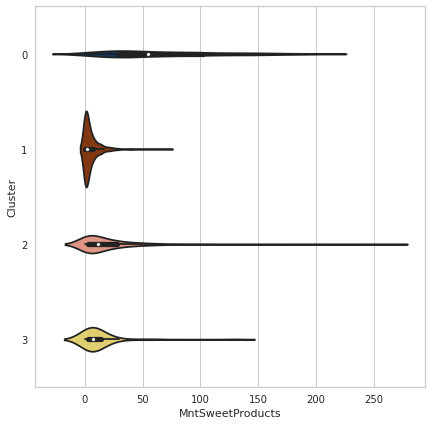

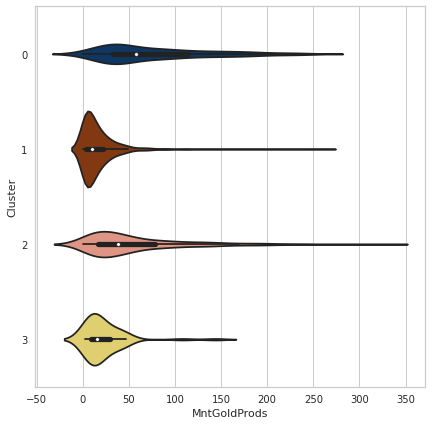

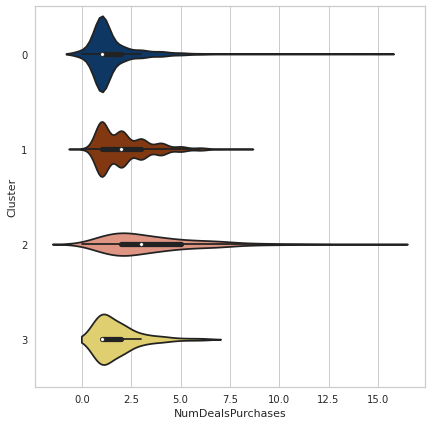

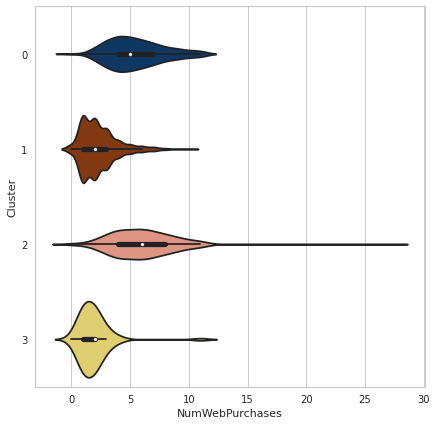

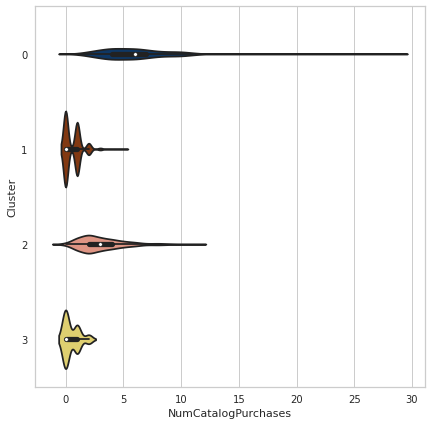

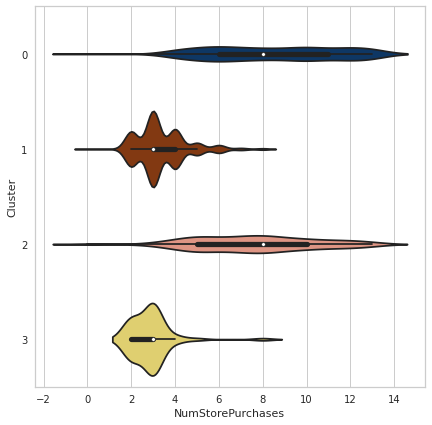

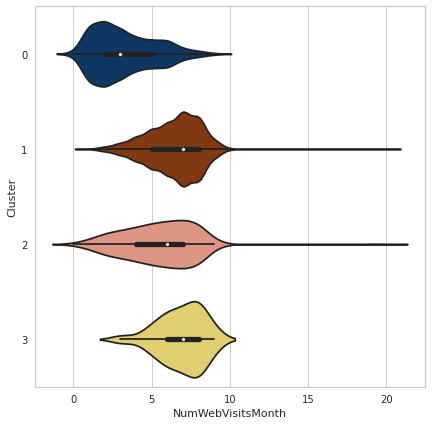

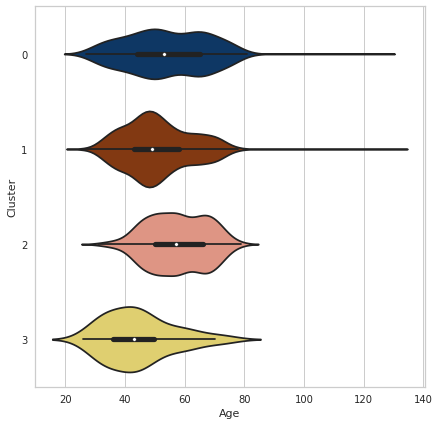

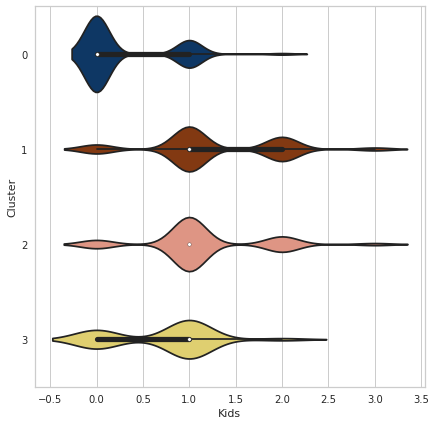

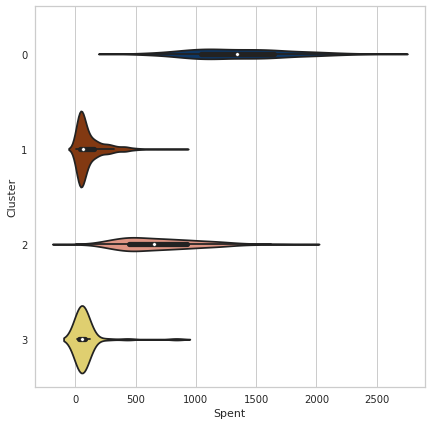

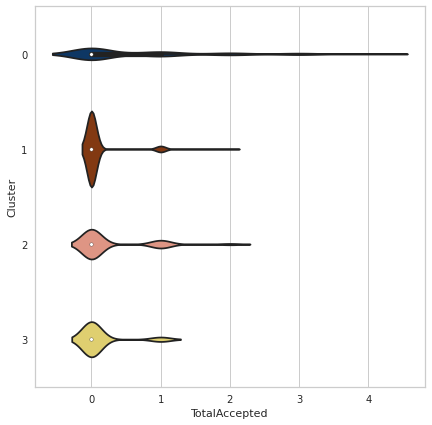

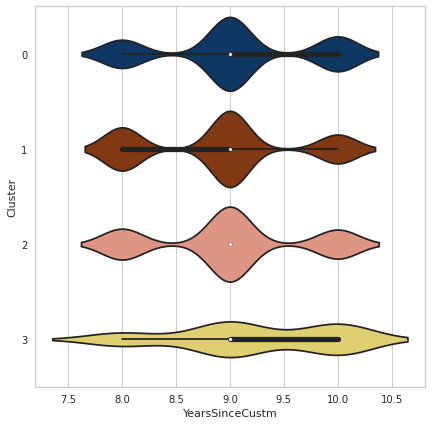

In [46]:
for column in num_cols:
    plt.figure(figsize=(7,7))
    sns.violinplot(y=df["Cluster"], x=df[column], palette=palette[:-1], orient="h")
    plt.show();

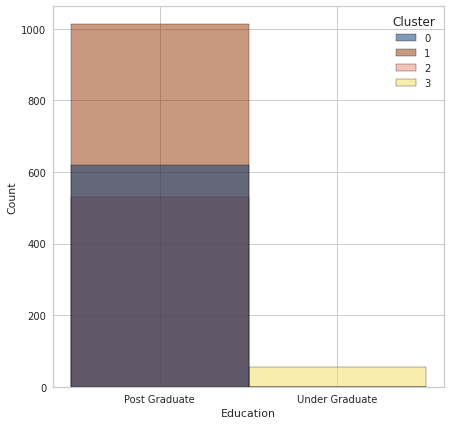

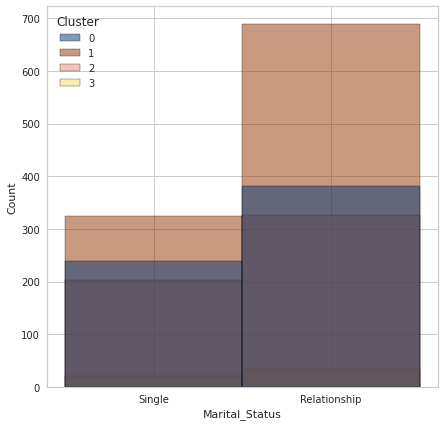

In [47]:
for column in object_cols:
    plt.figure(figsize=(7,7))
    sns.histplot(x=df[column], hue =df["Cluster"], palette=palette[:-1])
    plt.show();

* The two most-spending clusters are 0 and 2, so they are our main interest
* The income linearly influences the amount spent, from the most paid to the less paid : 0 - 2 - 1 - 3
* The last time a person bought something ( recency ) does NOT have an impact on the cluster
* Clusters 0 and 2 are A LOT into meat and wines
* Cluster 2 buys twice as much items at discounts as clusters 0 and 3
* Cluster 2 buys a lot of items on the Internet
* Cluster 0 buys a lot if items with a Catalog
* Clusters 1, 2 and 3 spend a lot of time on the website, whereas cluster 0 barely do it
* In average, clusters 0 and 1 are the oldest (\~55), cluster 2 is slightly younger (\~50) and cluster 3 is the youngest (~44)
* Cluster 0 generally doesn't have any kid, cluster 3 sometimes have a kid, clusters 1 and 2 generally have a kid or more
* Cluster 0 generally accept offers during campaign, while cluster 3 rarely do it
* All clusters are post-graduate except cluster 3
* Cluster 0 is slightly more likely to be single than the others, while Cluster 1 is slightly less likely than the others

<a id ="9"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Conclusion</p>

**As I wanted to train my communication skills, I considered making a report I could have given to the (imaginary) marketing team. Here are the sources I used to help me create this report :**

* [Canva](https://www.canva.com/)
* [12 Types of Customers [and How to Serve Them Best]](https://gettalkative.com/info/types-of-customers)
* [7 Types of Customers [And How to Satisfy Their Needs]](https://www.tidio.com/blog/types-of-customers/)

<img src="https://raw.githubusercontent.com/Brice-Vergnou/customer_segm/master/Reports/1.png" alt="Page 1" width="700" style="display: inline;"/>
<img src="https://raw.githubusercontent.com/Brice-Vergnou/customer_segm/master/Reports/2.png" alt="Page 2" width="700" style="display: inline;"/>


**[You can check the PDF directly on my Github](https://github.com/Brice-Vergnou/customer_segm/blob/master/Reports/customer_segmentation_report.pdf)**


Thanks for going through my notebook, if you found it useful, please consider upvoting it :)